In [1]:
#bulk_viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 22 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['0.033/', '0.1/', '0.33/', '1/', '3.3/', '10/']
from helper_fns import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, monitor = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
    print 'dir = ', dir
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'bulk_viscosity = ', bulk_viscosity
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    everything += [(r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous)]

dir =  0.033/
output_folder =  0.033/output
shear_viscosity =  1e-13
bulk_viscosity =  3.3e-15
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  0.1/
output_folder =  0.1/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-14
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  0.33/
output_folder =  0.33/output
shear_viscosity =  1e-13
bulk_viscosity =  3.3e-14
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  1/
output_folder =  1/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  3.3/
output_folder =  3.3/output
shear_viscosity =  1e-13
bulk_viscosity =  3.3e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332
dir =  10/
output_folder =  10/output
shear_viscosity =  1e-13
bulk_viscosity =  1e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.333333333332


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

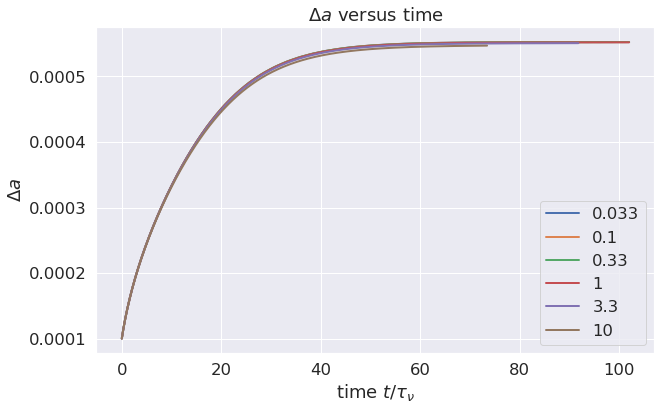

In [4]:
#plot delta_a versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    delta_a = a_outer - a_inner
    x = times_viscous
    y = delta_a
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[0:-1])
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

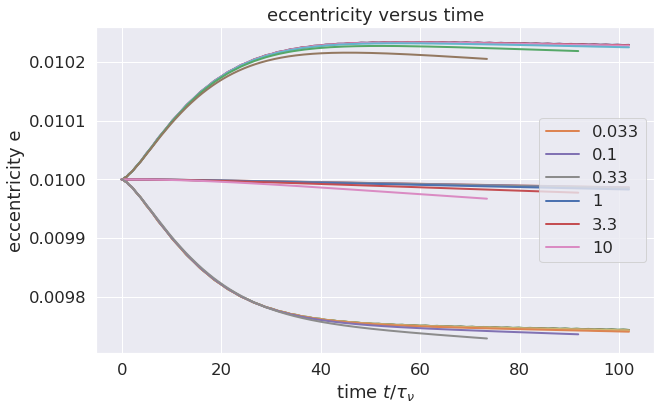

In [5]:
#plot eccentricity versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    x = times_viscous
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[0:-1])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=None)
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center right')

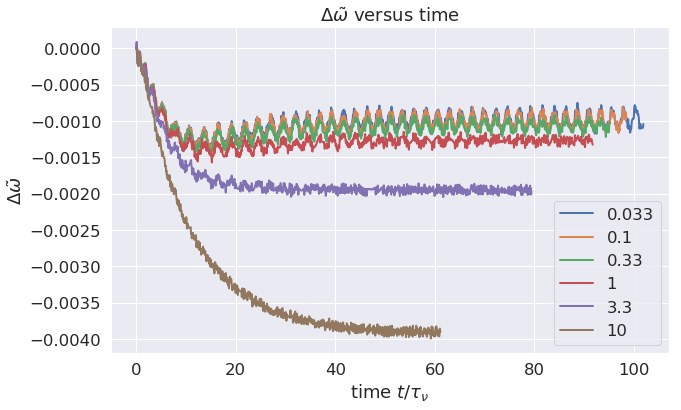

In [6]:
#plot delta_wt versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    delta_wt_list = []
    for t_idx in range(len(times)):
        s_idx = 0
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_inner = wt[t_idx, s_idx, theta_idx]
        s_idx = 1
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_outer = wt[t_idx, s_idx, theta_idx]
        delta_wt_list += [wt_outer - wt_inner]
    delta_wt = adjust_angle(np.array(delta_wt_list))
    x = times_viscous
    y = delta_wt
    t_idx_max = int(total_number_of_outputs*(1.0 - 0.2*idx/len(dirs)))
    p = ax.plot(x[:t_idx_max], y[:t_idx_max], linestyle='-', linewidth=2, alpha=1.0, label=dir[0:-1])
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc='lower right')

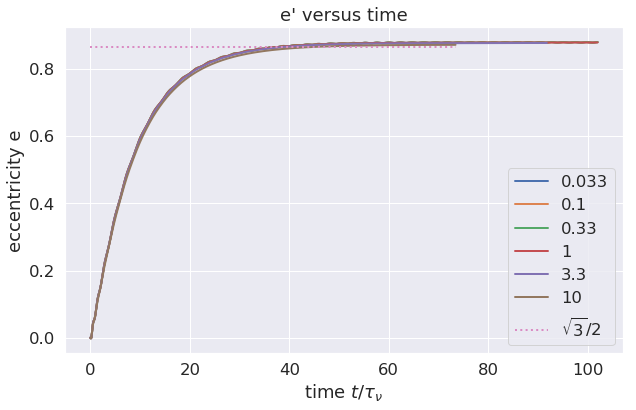

In [7]:
#plot e_prime versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    delta_e = e_outer - e_inner
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_avg = (a_outer + a_inner)/2
    delta_a = a_outer - a_inner
    e_prime = a_avg*delta_e/delta_a
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=dir[0:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title("e' versus time")
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='lower right')

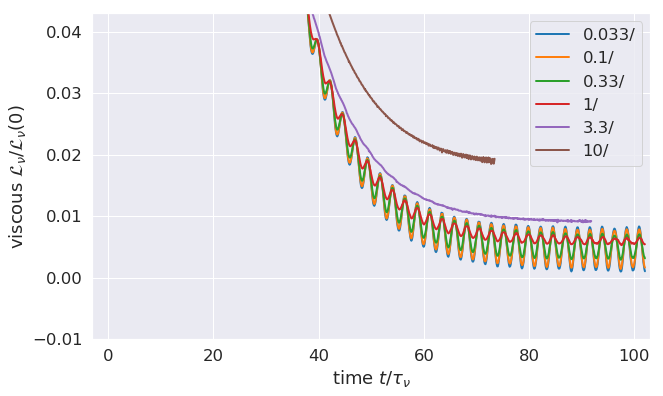

In [8]:
#plot e_prime versus time
from fluxes import *
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    #compute viscous angular momentum flux and luminosity
    G = -1.0
    c = -1.0
    nu_s = shear_viscosity
    nu_b = bulk_viscosity
    viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #compute gravitational angular momentum flux and luminosity 
    G = G_ring
    c = -1.0
    nu_s = -1.0
    nu_b = -1.0
    grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #calculate 
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    a0 = a_mean[0]
    w0 = Omega(J2, Rp, a0)
    r0 = r[0]
    t0 = t[0]
    vr0 = vr[0]
    vt0 = vt[0]
    wt0 = wt[0]
    lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r0, t0, vr0, vt0)
    delta_r = delta_f(r0, t0)
    sd0 = surface_density(lambda_, delta_r).mean()
    viscous_flux_circular = 1.5*shear_viscosity*sd0*a0*w0
    viscous_luminosity_circular = viscous_flux_circular*2*np.pi*a0
    color = color_seq[idx]
    #plot viscous_angular_momentum_luminosity
    x = times_viscous
    y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=dir)
p = ax.set_ylabel(r'viscous ${\cal L}_{\nu}/{\cal L}_{\nu}(0)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.01, 0.043)
p = ax.set_xlim(-3, 103)
p = ax.legend()

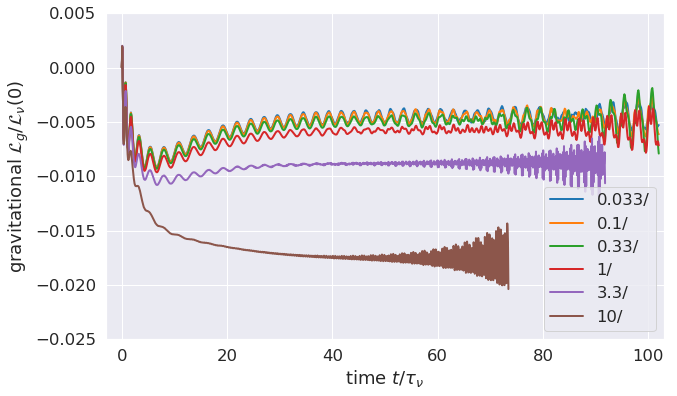

In [9]:
#plot e_prime versus time
from fluxes import *
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    #compute viscous angular momentum flux and luminosity
    G = -1.0
    c = -1.0
    nu_s = shear_viscosity
    nu_b = bulk_viscosity
    viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #compute gravitational angular momentum flux and luminosity 
    G = G_ring
    c = -1.0
    nu_s = -1.0
    nu_b = -1.0
    grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #calculate 
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    a0 = a_mean[0]
    w0 = Omega(J2, Rp, a0)
    r0 = r[0]
    t0 = t[0]
    vr0 = vr[0]
    vt0 = vt[0]
    wt0 = wt[0]
    lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r0, t0, vr0, vt0)
    delta_r = delta_f(r0, t0)
    sd0 = surface_density(lambda_, delta_r).mean()
    viscous_flux_circular = 1.5*shear_viscosity*sd0*a0*w0
    viscous_luminosity_circular = viscous_flux_circular*2*np.pi*a0
    color = color_seq[idx]
    #plot grav_angular_momentum_luminosity
    x = times_viscous
    y = grav_angular_momentum_luminosity/viscous_luminosity_circular
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=dir)
p = ax.set_ylabel(r'gravitational ${\cal L}_{g}/{\cal L}_{\nu}(0)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.025, 0.005)
p = ax.set_xlim(-3, 103)
p = ax.legend()

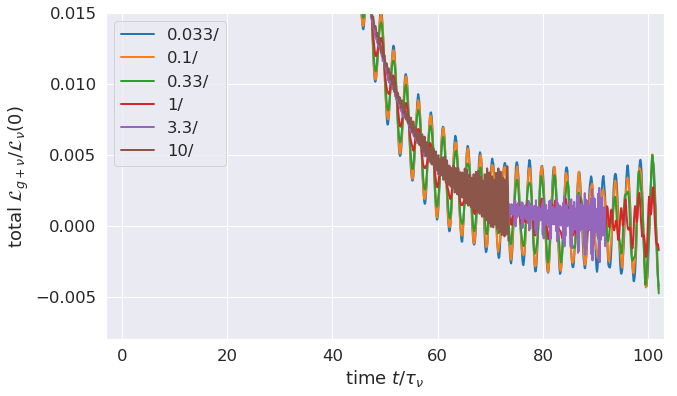

In [10]:
#plot e_prime versus time
from fluxes import *
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, monitor, a, e, wt, M, times_viscous = everything[idx]
    #compute viscous angular momentum flux and luminosity
    G = -1.0
    c = -1.0
    nu_s = shear_viscosity
    nu_b = bulk_viscosity
    viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #compute gravitational angular momentum flux and luminosity 
    G = G_ring
    c = -1.0
    nu_s = -1.0
    nu_b = -1.0
    grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
        calculate_angular_momentum_flux(total_ring_mass, number_of_streamlines, particles_per_streamline, J2, 
        Rp, G, nu_s, nu_b, c, r, t, vr, vt, wt, times, fast_gravity, confine_edges)
    #calculate 
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    a0 = a_mean[0]
    w0 = Omega(J2, Rp, a0)
    r0 = r[0]
    t0 = t[0]
    vr0 = vr[0]
    vt0 = vt[0]
    wt0 = wt[0]
    lambda_ = get_lambda(total_ring_mass, number_of_streamlines, J2, Rp, r0, t0, vr0, vt0)
    delta_r = delta_f(r0, t0)
    sd0 = surface_density(lambda_, delta_r).mean()
    viscous_flux_circular = 1.5*shear_viscosity*sd0*a0*w0
    viscous_luminosity_circular = viscous_flux_circular*2*np.pi*a0
    color = color_seq[idx]
    #plot total angular_momentum_luminosity
    x = times_viscous
    y = (viscous_angular_momentum_luminosity + grav_angular_momentum_luminosity)/viscous_luminosity_circular
    p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label=dir)
p = ax.set_ylabel(r'total ${\cal L}_{g+\nu}/{\cal L}_{\nu}(0)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.008, 0.015)
p = ax.set_xlim(-3, 103)
p = ax.legend()